# Day 1 : Multi-Armed Bandits

Install requirements

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

## Content

- Multi-armed Bandits
- Epsilon-Greedy
- Upper Confidence Bound (UCB)
- Bayesian UCB
- Thompson Sampling
- Exercise

## Multi-armed Bandits

Let us load the `BernoulliBandit` class.

In [2]:
from Day1.bandits import BernoulliBandit

We instantate an object of `BernoulliBandit` called `mab`.

In [3]:
# Number of bandits
n = 4

# List of probabilities of giving reward for each bandit
probas = [0.6, 0.2, 0.3, 0.55]

# Object instantiation
mab = BernoulliBandit(n, probas)

The object `mab` has only one method `generate_reward` which takes one input: the number of the arm being pulled. 

Let's generate some rewards.

In [4]:
for i in range(4):
    print('Sampled reward for {} bandit: {}'.format(i, mab.generate_reward(i)))

Sampled reward for 0 bandit: 0
Sampled reward for 1 bandit: 0
Sampled reward for 2 bandit: 0
Sampled reward for 3 bandit: 0


## Epsilon-Greedy Strategy

In [5]:
from Day1.solvers import EpsilonGreedy

We instantiate an `EpsilonGreedy` strategy by providing a `BernoulliBandit` object and a number $\epsilon \in [0,1]$ which is the probability of exploration. 

In [6]:
# Epsilon value
epsilon = 0.1

# Object instantiation
egreedy = EpsilonGreedy(mab, epsilon)

The object `egreedy` has the method `run` which takes as input an integer `num_steps` and does the following loop for `num_steps` times:
- Select an arm according to the strategy. That is, with probability $\epsilon$ select a random arn and with probability $1 - \epsilon$ select the arm with the best sampled mean reward.
- Observe the reward.
- Update the strategy. That is, update the observed reward frequency for each arm.

Let us run the strategy for a number of rounds and plot the regret. 

Text(0.5, 1.0, 'Regret')

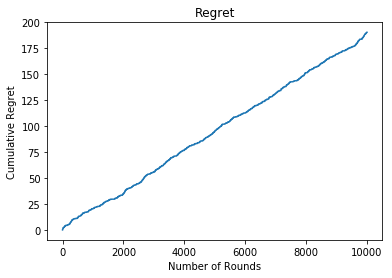

In [7]:
# Number of rounds
n = 10000

# Run for n rounds
egreedy.run(n)

# Plot cumulative regret
plt.plot(egreedy.regrets)
plt.xlabel('Number of Rounds')
plt.ylabel('Cumulative Regret')
plt.title('Regret')

## Upper Confidence Bound (UCB)

In [8]:
from Day1.solvers import UCB

We instantiate an `UCB` strategy by providing a `BernoulliBandit` object.

In [9]:
# Object instantiation
ucb = UCB(mab)

The object `ucb` has the method `run` which takes as input an integer `num_steps` and does the following loop for `num_steps` times:
- Select an arm according to the strategy. That is, select the greediest action to maximize the upper confidence bound estimated via the Hoeffding’s inequality.
- Observe the reward.
- Update the strategy. That is, update the observed reward frequency and the upper confidence bound for each arm.

Let us run the strategy for a number of rounds and plot the regret. 

Text(0.5, 1.0, 'Regret')

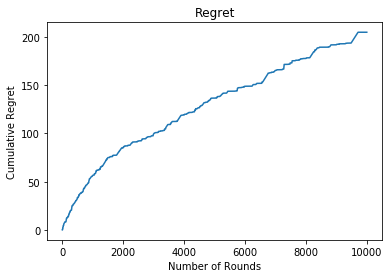

In [10]:
# Number of rounds
n = 10000

# Run for n rounds
ucb.run(n)

# Plot cumulative regret
plt.plot(ucb.regrets)
plt.xlabel('Number of Rounds')
plt.ylabel('Cumulative Regret')
plt.title('Regret')

## Bayesian UCB

In [11]:
from Day1.solvers import BayesianUCB

We instantiate an `BayesianUCB` strategy by providing a `BernoulliBandit` object, a positive integer `c` and optionally two positive integers `init_a` and `init_b`. `BayesianUCB` makes use of a beta distribution (one for each arm) to model the **belief distribution** for the probability of distributing reward. This belief probability is parametrized by values `a` and `b` which are initialized to `init_a=1` and `init_b=1` (this codes for a uniform distribution on the interval $[0,1]$). If additinal information is known of the belief distribution of the arms it can be provided to the solver by changing these default values. The integer `c` establishes how many standard deviations to consider as upper confidence bound. 

In [12]:
# Object instantiation
b_ucb = BayesianUCB(mab, c=3)

The object `b_ucb` has the method `run` which takes as input an integer `num_steps`. The solver does the following loop for `num_steps` times:

- Select an arm according to the strategy. That is, select the greediest action to maximize the upper confidence bound estimated using `c` standard deviations of the belief distribution.
- Observe the reward.
- Update the strategy. That is, update the parameters `a` and `b` of the belief distribution of each arm.

Let us run the strategy for a number of rounds and plot the regret. 

Text(0.5, 1.0, 'Regret')

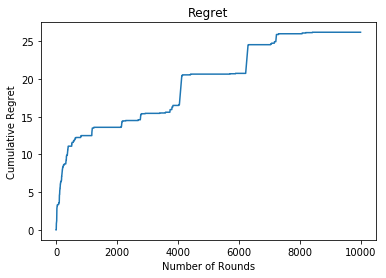

In [13]:
# Number of rounds
n = 10000

# Run for n rounds
b_ucb.run(n)

# Plot cumulative regret
plt.plot(b_ucb.regrets)
plt.xlabel('Number of Rounds')
plt.ylabel('Cumulative Regret')
plt.title('Regret')

We can also visualize the probability density function of the beta distribution for each arm.

In [14]:
from Day1.util import plot_beta

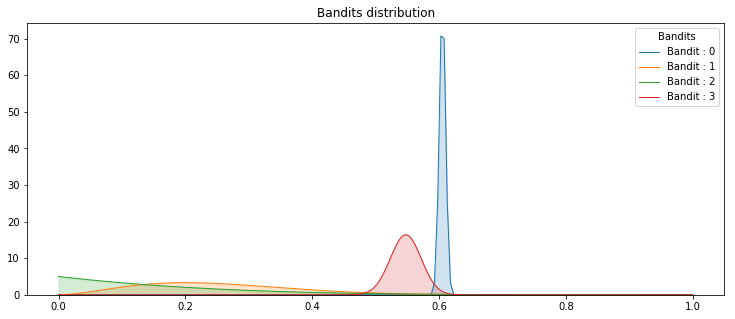

In [15]:
plot_beta(b_ucb)

## Thompson Sampling

In [16]:
from Day1.solvers import ThompsonSampling

We instantiate an `ThompsonSampling` strategy by providing a `BernoulliBandit` object, and optionally two positive integers `init_a` and `init_b` that initalise the belief beta distribution for each arm in the same manner as we did for the `BayesianUCB` method.

In [17]:
# Object instantiation
thompson = ThompsonSampling(mab)

The object `thompson` has the method `run` which takes as input an integer `num_steps`. The solver does the following loop for `num_steps` times:

- Select an arm according to the strategy. That is, we sample from the belief distribution for each arm and select the action that maximizes the sample value.
- Observe the reward.
- Update the strategy. That is, update the parameters `a` and `b` of the belief distribution of each arm.

Let us run the strategy for a number of rounds and plot the regret. 

Text(0.5, 1.0, 'Regret')

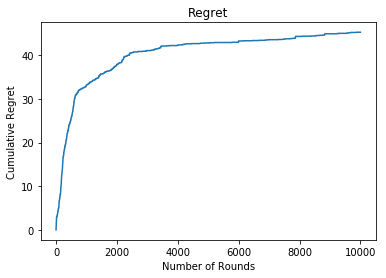

In [18]:
# Number of rounds
n = 10000

# Run for n rounds
thompson.run(n)

# Plot cumulative regret
plt.plot(thompson.regrets)
plt.xlabel('Number of Rounds')
plt.ylabel('Cumulative Regret')
plt.title('Regret')

Let's visualize the pdf of the beta distribution for each arm.

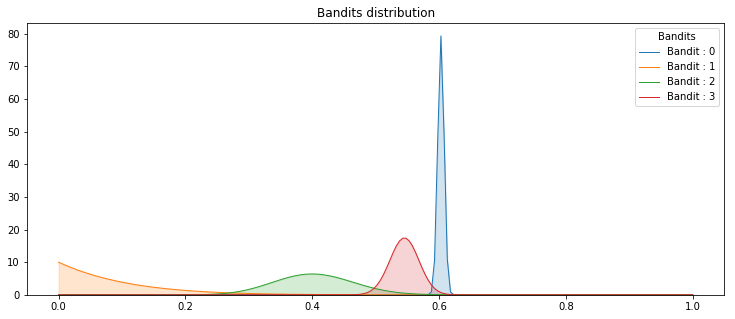

In [19]:
plot_beta(thompson)

## Exercise 

Make some experiments to compare the performance of each of the multi-armed bandit solvers.

Suggestion: you could compute a distribution of regret (after 10000 rounds)  for the different solvers using 4-bandits with random probabilities. 

You may use the following function to visualize the results.

In [20]:
from Day1.util import plot_results
help(plot_results)

Help on function plot_results in module Day1.util:

plot_results(solvers, solver_names)
    Plot the results by multi-armed bandit solvers.
    
    Args:
        solvers (list<Solver>): All of them should have been fitted.
        solver_names (list<str>)



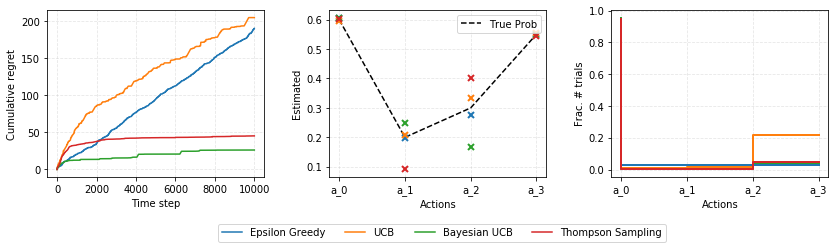

In [21]:
plot_results([egreedy, ucb, b_ucb, thompson], 
             ['Epsilon Greedy', 'UCB', 'Bayesian UCB', 'Thompson Sampling'])